<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_63_to_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEZIONE_63: INTRO
In questa sezione andiamo a vedere come generare ed ottimizzare una strategia basata sul MACD, successivamente vedremo la comparazione tra Backtesting e Forward testing (out of sample). coem ultimo step creeremo l'OOP Framework anche per questa strategia, andandola poi a Backtestare

In [29]:
#LEZIONE_64: MACD STRATEGY OVERVIEW

ge
qf=cf.QuantFigdf=(df=ge.loc[:,"2019"])
qf.add_macd(fast_period=12,slow_period=26,signal_period=9)
qf.iplot(asFigure=True)
qf.iplot(figsize=(8,12),title="MACD", fontsize=12)

LEZIONE_64: GETTING DATA


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
df=pd.read_csv("/content/eurusd.csv",parse_dates=True,index_col=0)

df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


LEZIONE_64: GETTING DATA

In [33]:
#Importiamo le librerie ed i dati
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("/content/eurusd.csv",parse_dates=True,index_col=0)

data.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


<Axes: title={'center': 'EURUSD'}, xlabel='Date'>

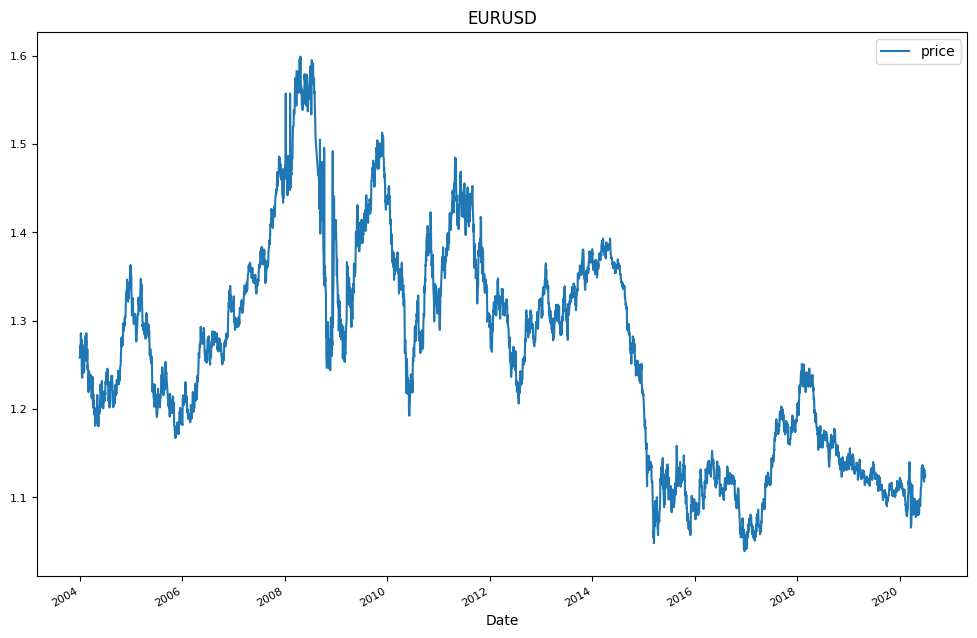

In [35]:
data.plot(figsize=(12,8),title="EURUSD", fontsize=8)

LEZIONE_66: DEFINING MACD STRATEGY(PART_1)



<Axes: xlabel='Date'>

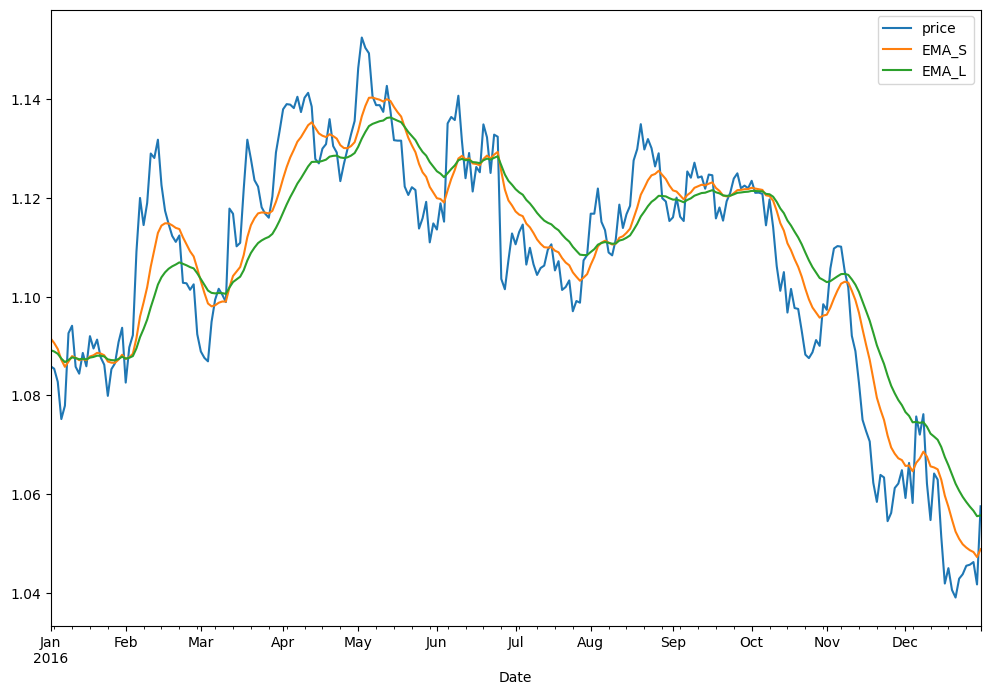

In [36]:
ema_s=12
ema_l=26

data["EMA_S"]=data.price.ewm(span=ema_s,min_periods=ema_s).mean()
data["EMA_L"]=data.price.ewm(span=ema_l,min_periods=ema_l).mean()

data.loc["2016",["price","EMA_S","EMA_L"]].plot(figsize=(12,8))

In [37]:
data["MACD"]=data.EMA_S-data.EMA_L


In [38]:
data

,price,EMA_S,EMA_L,MACD
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,NaN,NaN,NaN
2004-01-05,1.268698,NaN,NaN,NaN
2004-01-06,1.272103,NaN,NaN,NaN
2004-01-07,1.264095,NaN,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272
2020-06-25,1.125087,1.125118,1.118388,0.006730
2020-06-26,1.122208,1.124670,1.118671,0.005999


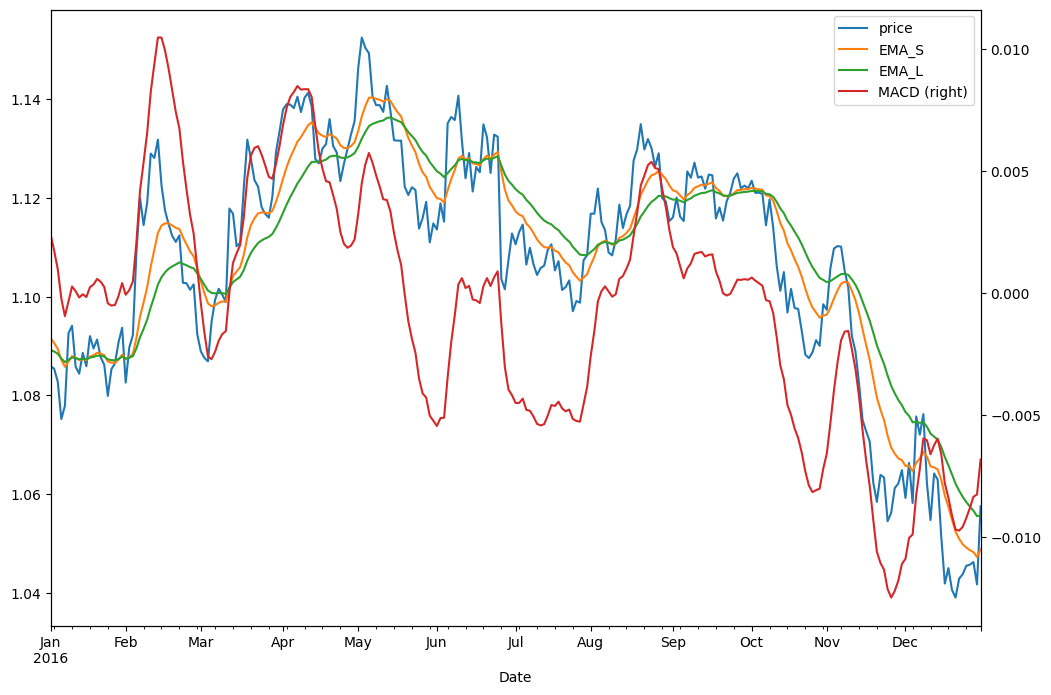

In [43]:
#Adesso andiamo a plottare il prezzo, le medie mobili esponenziali ed il MACD
#IMPORANTE: Comprendere la parte di codice SECONDARY_Y (in fase di ripasso),
#che comunque per quello che ho compreso crea un'axis secondaria sull'asse Y
data.loc["2016",["price","EMA_S","EMA_L","MACD"]].plot(figsize=(12,8),secondary_y="MACD")
plt.show()

In [46]:
#Creiamo un "segnale", come una finestra di calcolo per il MACD:
#solo in questo modo potremo incrociarlo con l'altra MACD e generare dei segnali
#di trading
signal_mw=9

In [47]:
#Creiamo il MACD_Signal
data["MACD_Signal"]=data.MACD.ewm(span=signal_mw,min_periods=signal_mw).mean()

In [48]:
data

,price,EMA_S,EMA_L,MACD,position,MACD_Signal
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,-1,NaN
2004-01-02,1.258194,NaN,NaN,NaN,-1,NaN
2004-01-05,1.268698,NaN,NaN,NaN,-1,NaN
2004-01-06,1.272103,NaN,NaN,NaN,-1,NaN
2004-01-07,1.264095,NaN,NaN,NaN,-1,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,1,0.008516
2020-06-25,1.125087,1.125118,1.118388,0.006730,1,0.008158
2020-06-26,1.122208,1.124670,1.118671,0.005999,1,0.007727


In [49]:
#Scegliamo di lavorare solo sui dati del 2016
data.loc["2016"]

,price,EMA_S,EMA_L,MACD,position,MACD_Signal
Date,,,,,,
2016-01-01,1.085906,1.091559,1.089167,0.002392,1,0.002641
2016-01-04,1.085399,1.090611,1.088888,0.001723,1,0.002458
2016-01-05,1.082755,1.089402,1.088433,0.000969,1,0.002160
2016-01-06,1.075199,1.087217,1.087453,-0.000236,-1,0.001681
2016-01-07,1.077900,1.085784,1.086745,-0.000962,-1,0.001152
...,...,...,...,...,...,...
2016-12-26,1.045478,1.049165,1.058405,-0.009240,-1,-0.008833
2016-12-27,1.045697,1.048631,1.057464,-0.008832,-1,-0.008833
2016-12-28,1.046233,1.048262,1.056632,-0.008370,-1,-0.008740


<Axes: xlabel='Date'>

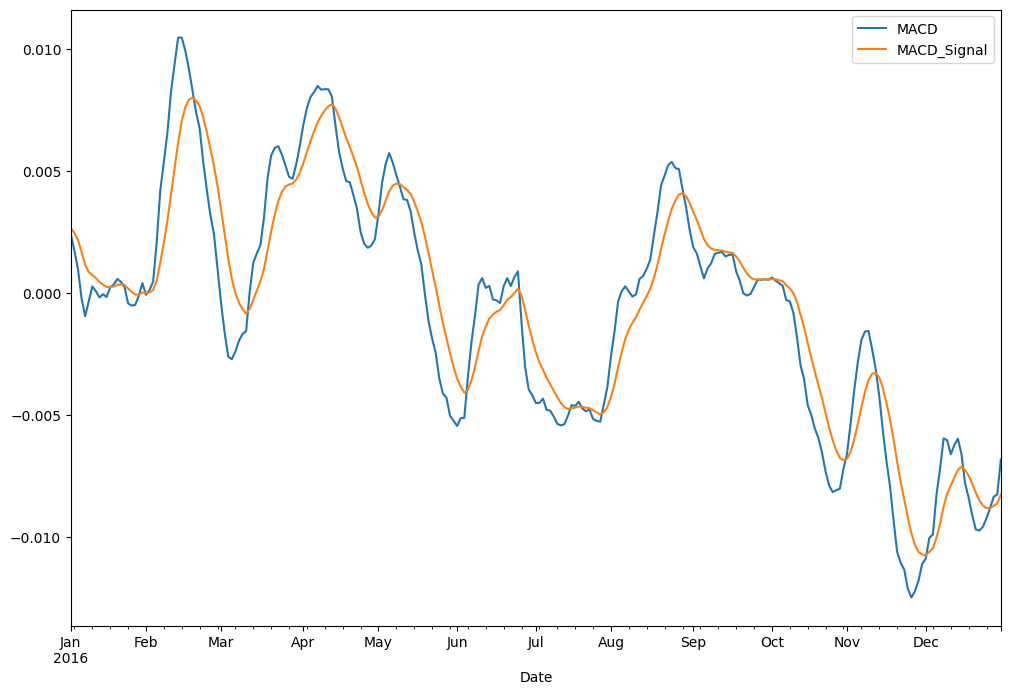

In [50]:
#Plottiamo le MACD per il 2016
data.loc["2016",["MACD","MACD_Signal"]].plot(figsize=(12,8))

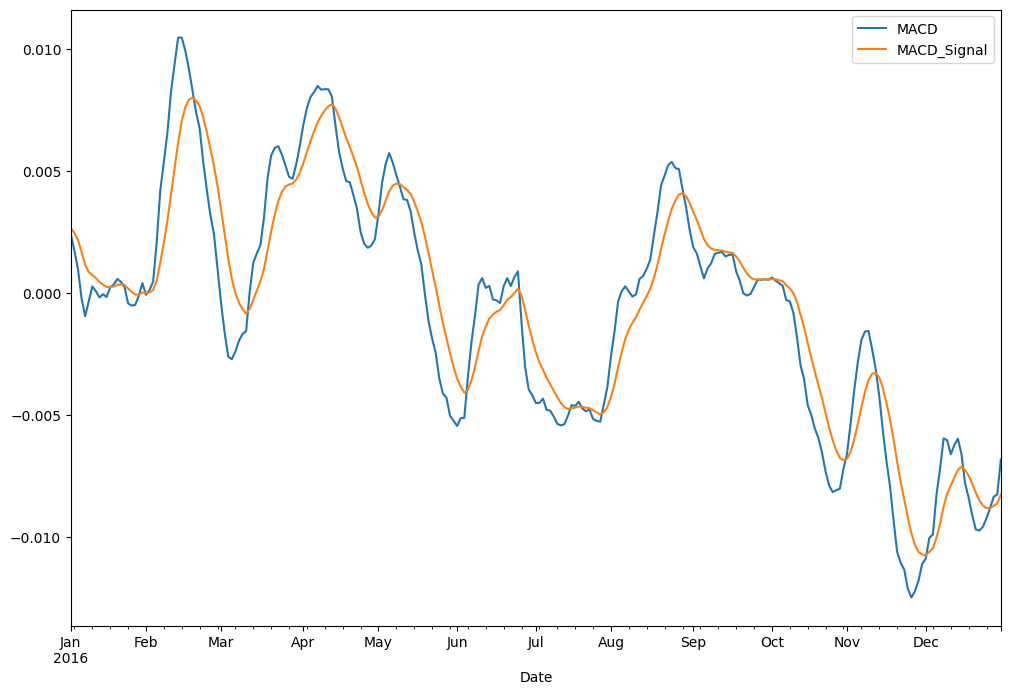

In [91]:
#Plottiamo le due MACD
data["position"]=np.where(data.MACD>0,1,-1)
data.loc["2016",["MACD","MACD_Signal"]].plot(figsize=(12,8),secondary_y="position")
plt.show()

LEZIONE_66: DEFINING MACD STRATEGY (PART_2)

In [53]:
#Inseriamo la colonna per le posizioni
data["position"]=np.where(data.MACD>0,1,-1)
data


,price,EMA_S,EMA_L,MACD,position,MACD_Signal
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,-1,NaN
2004-01-02,1.258194,NaN,NaN,NaN,-1,NaN
2004-01-05,1.268698,NaN,NaN,NaN,-1,NaN
2004-01-06,1.272103,NaN,NaN,NaN,-1,NaN
2004-01-07,1.264095,NaN,NaN,NaN,-1,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,1,0.008516
2020-06-25,1.125087,1.125118,1.118388,0.006730,1,0.008158
2020-06-26,1.122208,1.124670,1.118671,0.005999,1,0.007727


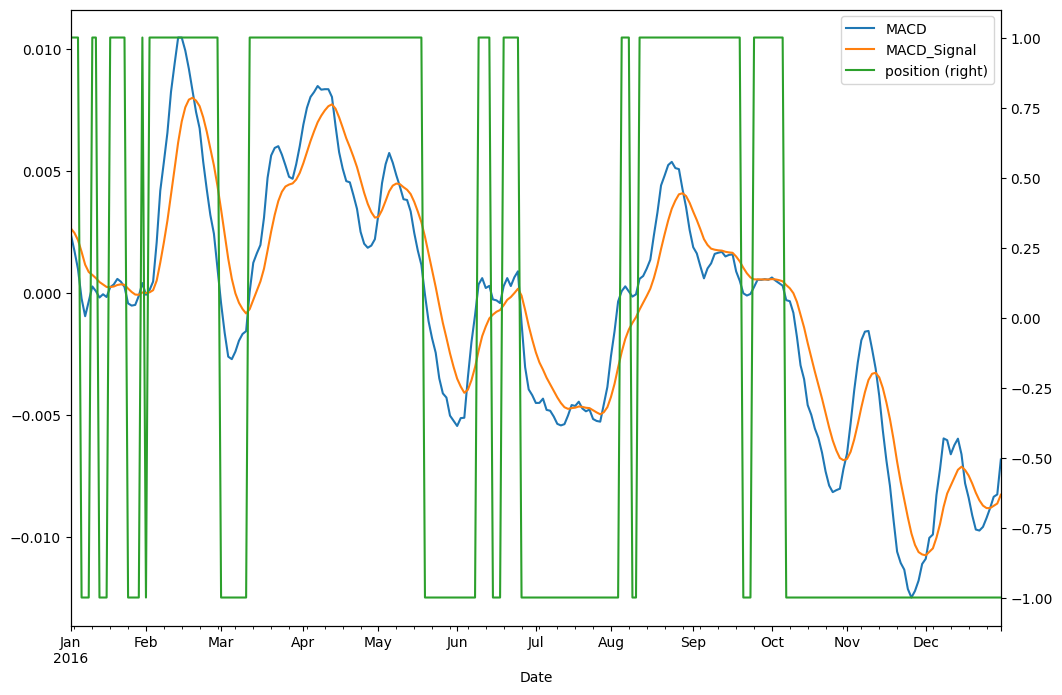

In [55]:
#Plotttiamo le MACD con le posizioni
data.loc["2016",["MACD","MACD_Signal","position"]].plot(figsize=(12,8),secondary_y="position")
plt.show()

LEZIONE_68: VECTORIZING BACKTEST

In [56]:
#Creaiamo la colonna RETURNS
data["returns"]=np.log(data.price.div(data.price.shift(1)))

In [57]:
data.dropna(inplace=True)

In [58]:
data

,price,EMA_S,EMA_L,MACD,position,MACD_Signal,returns
Date,,,,,,,
2004-02-17,1.285793,1.271256,1.266191,0.005065,1,0.003018,0.007251
2004-02-18,1.272508,1.271449,1.266693,0.004756,1,0.003408,-0.010386
2004-02-19,1.275705,1.272106,1.267405,0.004700,1,0.003691,0.002510
2004-02-20,1.254202,1.269345,1.266367,0.002978,1,0.003538,-0.017000
2004-02-23,1.257197,1.267473,1.265649,0.001824,1,0.003175,0.002386
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,1,0.008516,0.002892
2020-06-25,1.125087,1.125118,1.118388,0.006730,1,0.008158,-0.005449
2020-06-26,1.122208,1.124670,1.118671,0.005999,1,0.007727,-0.002562


In [78]:
data["strategy"]=data["position"].shift(1)*data["returns"]


In [79]:
data

,price,EMA_S,EMA_L,MACD,position,MACD_Signal,returns,strategy,trades,creturns,cstrategy,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,1,0.003408,-0.010386,NaN,0.0,0.989667,NaN,NaN,NaN
2004-02-19,1.275705,1.272106,1.267405,0.004700,1,0.003691,0.002510,0.002510,0.0,0.992154,1.002513,1.002513,2.725122
2004-02-20,1.254202,1.269345,1.266367,0.002978,1,0.003538,-0.017000,-0.017000,0.0,0.975430,0.985614,0.985614,7.301847
2004-02-23,1.257197,1.267473,1.265649,0.001824,1,0.003175,0.002386,0.002386,0.0,0.977760,0.987969,0.987969,19.611103
2004-02-24,1.267797,1.267523,1.265817,0.001706,1,0.002868,0.008395,0.008395,0.0,0.986003,0.996298,0.996298,53.111518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,1,0.008516,0.002892,0.002892,0.0,0.879795,0.700845,0.700845,inf
2020-06-25,1.125087,1.125118,1.118388,0.006730,1,0.008158,-0.005449,-0.005449,0.0,0.875014,0.697036,0.697036,inf
2020-06-26,1.122208,1.124670,1.118671,0.005999,1,0.007727,-0.002562,-0.002562,0.0,0.872775,0.695253,0.695253,inf


In [62]:
data.dropna(inplace=True)

In [63]:
pct=0.00007

In [64]:
data["trades"]=data.position.diff().fillna(0).abs()

In [72]:
data.trades.value_counts()

,count
trades,
0.0,4093
2.0,148


In [84]:
data["strategy_net"]=data["strategy"]-data["trades"]*pct

In [85]:
data["creturns"]=data["returns"].cumsum().apply(np.exp)
data["cstrategy"]=data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"]=data["strategy_net"].cumsum().apply(np.exp)

In [86]:
data

,price,EMA_S,EMA_L,MACD,position,MACD_Signal,returns,strategy,trades,creturns,cstrategy,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2004-02-18,1.272508,1.271449,1.266693,0.004756,1,0.003408,-0.010386,NaN,0.0,0.989667,NaN,NaN,NaN
2004-02-19,1.275705,1.272106,1.267405,0.004700,1,0.003691,0.002510,0.002510,0.0,0.992154,1.002513,0.002510,1.002513
2004-02-20,1.254202,1.269345,1.266367,0.002978,1,0.003538,-0.017000,-0.017000,0.0,0.975430,0.985614,-0.017000,0.985614
2004-02-23,1.257197,1.267473,1.265649,0.001824,1,0.003175,0.002386,0.002386,0.0,0.977760,0.987969,0.002386,0.987969
2004-02-24,1.267797,1.267523,1.265817,0.001706,1,0.002868,0.008395,0.008395,0.0,0.986003,0.996298,0.008395,0.996298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125123,1.117852,0.007272,1,0.008516,0.002892,0.002892,0.0,0.879795,0.700845,0.002892,0.686473
2020-06-25,1.125087,1.125118,1.118388,0.006730,1,0.008158,-0.005449,-0.005449,0.0,0.875014,0.697036,-0.005449,0.682742
2020-06-26,1.122208,1.124670,1.118671,0.005999,1,0.007727,-0.002562,-0.002562,0.0,0.872775,0.695253,-0.002562,0.680995


<Axes: title={'center': 'EURUSD'}, xlabel='Date'>

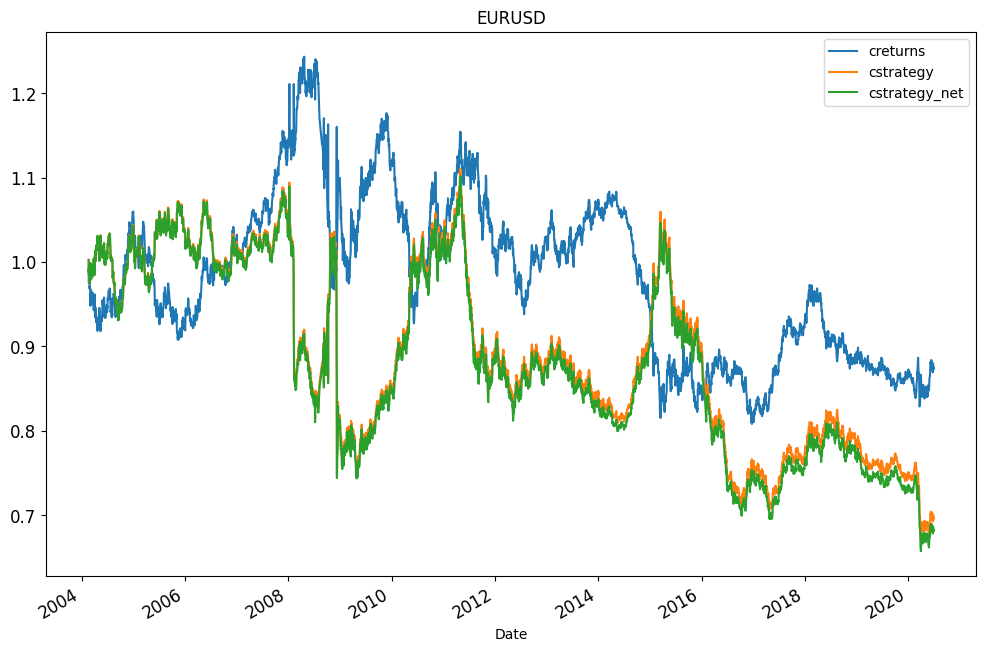

In [89]:
data[["creturns","cstrategy","cstrategy_net"]].plot(figsize=(12,8),title="EURUSD",fontsize=12)

LEZIONE_69: MACD BACKTESTING CLASS IN ACTION

In [8]:
!pip install scypy

ERROR: Could not find a version that satisfies the requirement scypy (from versions: none)
ERROR: No matching distribution found for scypy


In [9]:
#Importiamo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scypy.optimize import brute

ModuleNotFoundError: No module named 'scypy'

In [3]:
data=pd.read_csv("/content/forex_pairs.csv",delimiter="\t")

In [4]:
data

,"Date,AUDEUR=X,EURUSD=X,USDGBP=X"
0,"2004-01-01,0.5978000164031982,1.25819396972656..."
1,"2004-01-02,0.6031399965286255,1.25819396972656..."
2,"2004-01-05,0.604669988155365,1.268697500228881..."
3,"2004-01-06,0.6035000085830688,1.27210283279418..."
4,"2004-01-07,0.6072800159454346,1.26409471035003..."
...,...
4290,"2020-06-24,0.6134899854660034,1.13123452663421..."
4291,"2020-06-25,0.6093800067901611,1.12508726119995..."
4292,"2020-06-26,0.6137300133705139,1.12220847606658..."
4293,"2020-06-29,0.6112800240516663,1.12258648872375..."


In [7]:
from MACDBacktester import MACDBacktester as MACD

In [12]:
pct=0.00007

In [14]:
tester=MACD("EURUSD=X", EMA_S=12, EMA_L=35,signal_mw=9,start="2004-01-01", end="2020-06-30",tc= pct)

In [16]:
tester

MACDBacktester(symbol = EURUSD=X, MACD(12, 35, 9), start = 2004-01-01, end = 2020-06-30)

In [17]:
tester.data

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.113963,0.011160,0.012255
2020-06-25,1.125087,-0.005449,1.125118,1.114581,0.010537,0.011911
2020-06-26,1.122208,-0.002562,1.124670,1.115005,0.009665,0.011462


In [18]:
tester.test_strategy()

(np.float64(0.530733), np.float64(-0.372799))

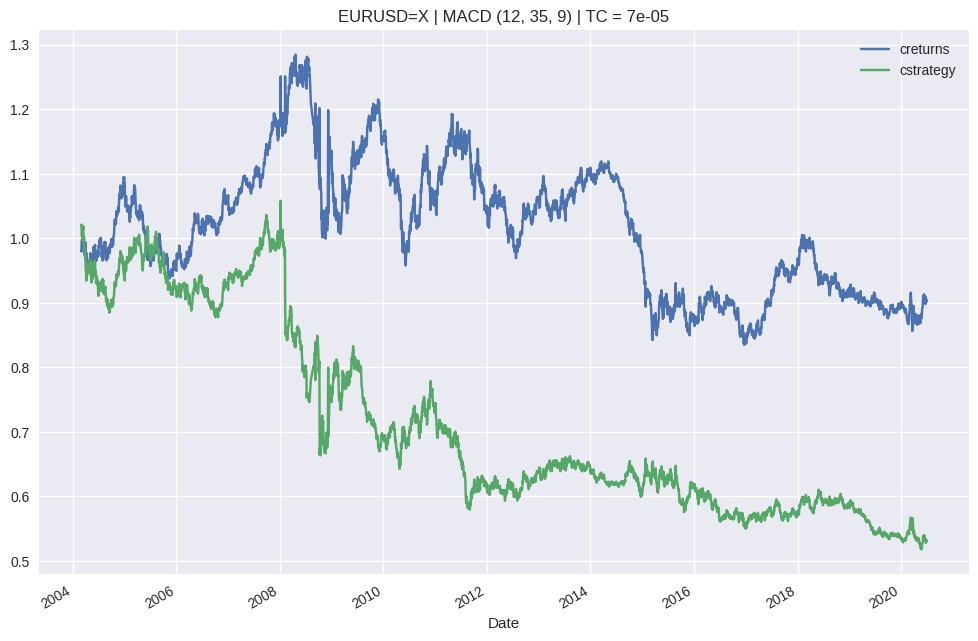

In [19]:
tester.plot_results()

In [20]:
tester.optimize_parameters((5,20,1),(21,50,1),(5,20,1))

/content/MACDBacktester.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["MACD"] > data["MACD_Signal"], 1, -1)
/content/MACDBacktester.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data["position"].shift(1) * data["returns"]
/content/MACDBacktester.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

(array([18., 30., 19.]), np.float64(0.760579))

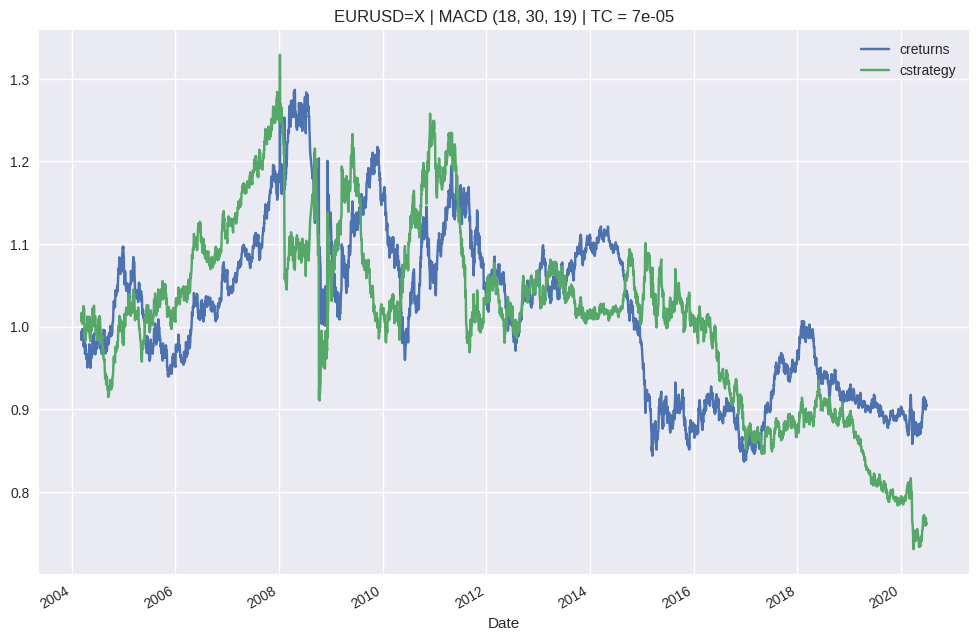

In [21]:
tester.plot_results()

In [18]:
#Adesso testiamo la stessa strategia su un'altro asset

In [28]:
pct=0.00007

In [29]:
tester=MACD("AUDEUR=X", EMA_S=12, EMA_L=35,signal_mw=9,start="2004-01-01", end="2020-06-30",tc= pct)

In [30]:
tester.data()

TypeError: 'DataFrame' object is not callable

In [32]:
tester.test_strategy()

(np.float64(0.814426), np.float64(-0.169962))

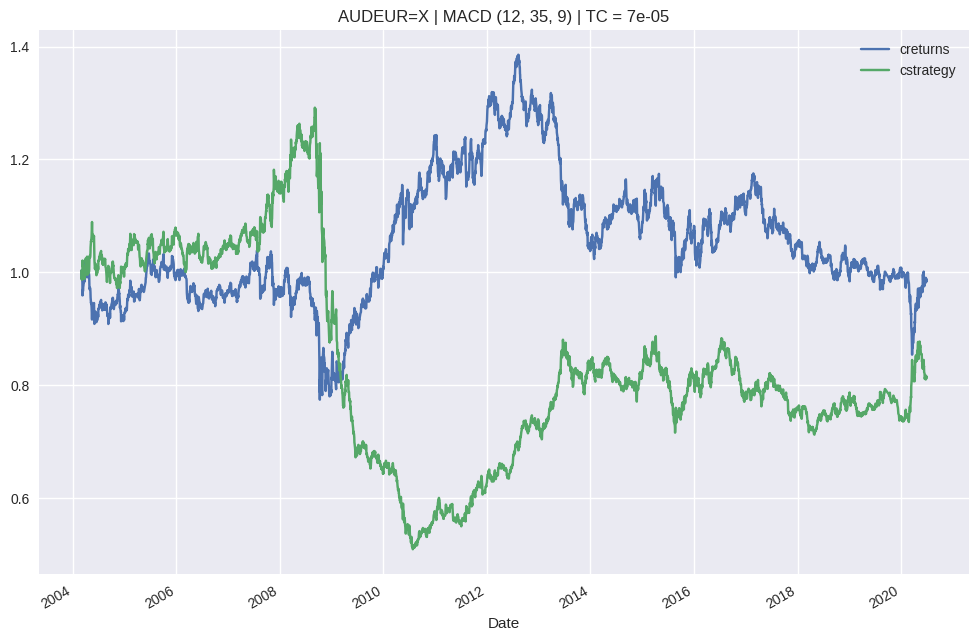

In [33]:
tester.plot_results()

In [34]:
tester.optimize_parameters((5,20,1),(21,50,1),(5,20,1))

/content/MACDBacktester.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["MACD"] > data["MACD_Signal"], 1, -1)
/content/MACDBacktester.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data["position"].shift(1) * data["returns"]
/content/MACDBacktester.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

(array([ 5., 23.,  6.]), np.float64(2.027517))

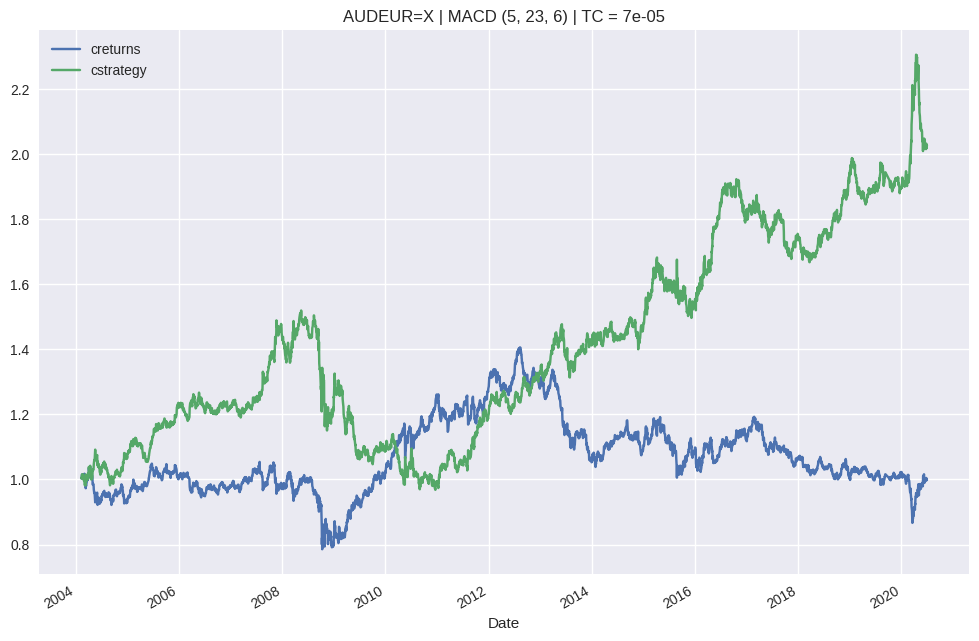

In [35]:
tester.plot_results()

OPTIMIZATION AND BACKTESTING: 2004-2014

Adesso andiamo a valutare la bontà della strategia dividendo il Dataset in due parti: la prima per l'ottimizzazione della strategia, la seconda per il test su dati OUT OF SAMPLE.

Svilupperemo tutto questo in maniera semplificata con il modulo MACDBacktester, semplicemente utilizzando due Dataset attraverso il tester

In [36]:
tester=MACD("AUDEUR=X", EMA_S=12, EMA_L=35,signal_mw=9,start="2004-01-01", end="2014-12-31",tc= pct)

In [37]:
tester.test_strategy()

(np.float64(0.821513), np.float64(-0.262333))

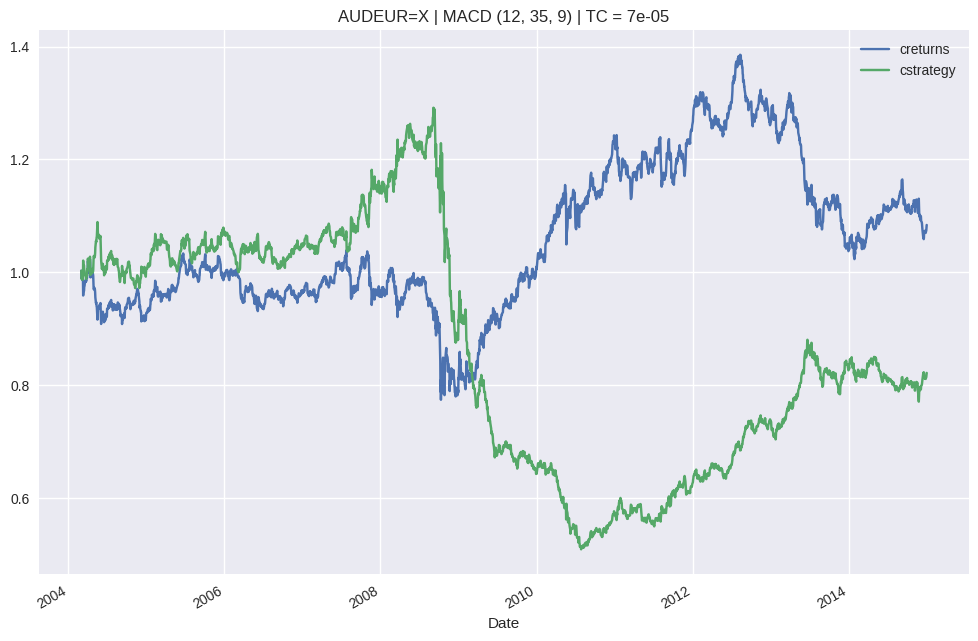

In [38]:
tester.plot_results()

In [39]:
tester.optimize_parameters((5,20,1),(21,50,1),(5,20,1))

/content/MACDBacktester.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["MACD"] > data["MACD_Signal"], 1, -1)
/content/MACDBacktester.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data["position"].shift(1) * data["returns"]
/content/MACDBacktester.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

(array([ 6., 24.,  7.]), np.float64(1.497132))

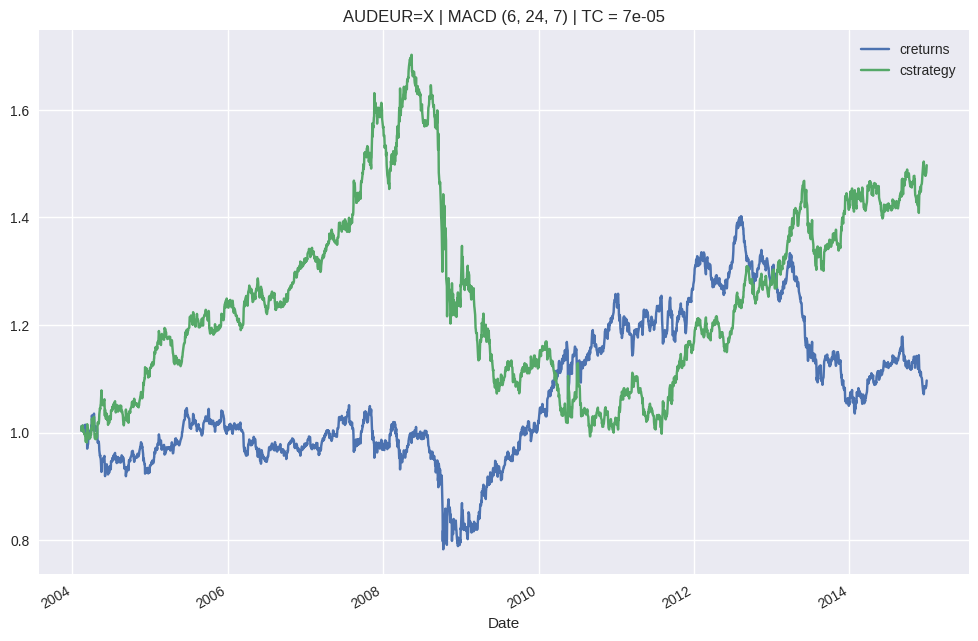

In [40]:
tester.plot_results()

In [41]:
#Adesso sviluppiamo il backtest su dati OUT OF SAMPLE per verificare l'assenza di overfitting
#dovuta all'utilizzo della funzione BRUTE per l'ottimizzazione dei parametri

In [42]:
tester=MACD("AUDEUR=X", EMA_S=12, EMA_L=35,signal_mw=9,start="2015-01-01", end="2020-06-30",tc= pct)

In [43]:
tester.optimize_parameters((5,20,1),(21,50,1),(5,20,1))

/content/MACDBacktester.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["MACD"] > data["MACD_Signal"], 1, -1)
/content/MACDBacktester.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data["position"].shift(1) * data["returns"]
/content/MACDBacktester.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

(array([ 5., 26.,  6.]), np.float64(1.297923))

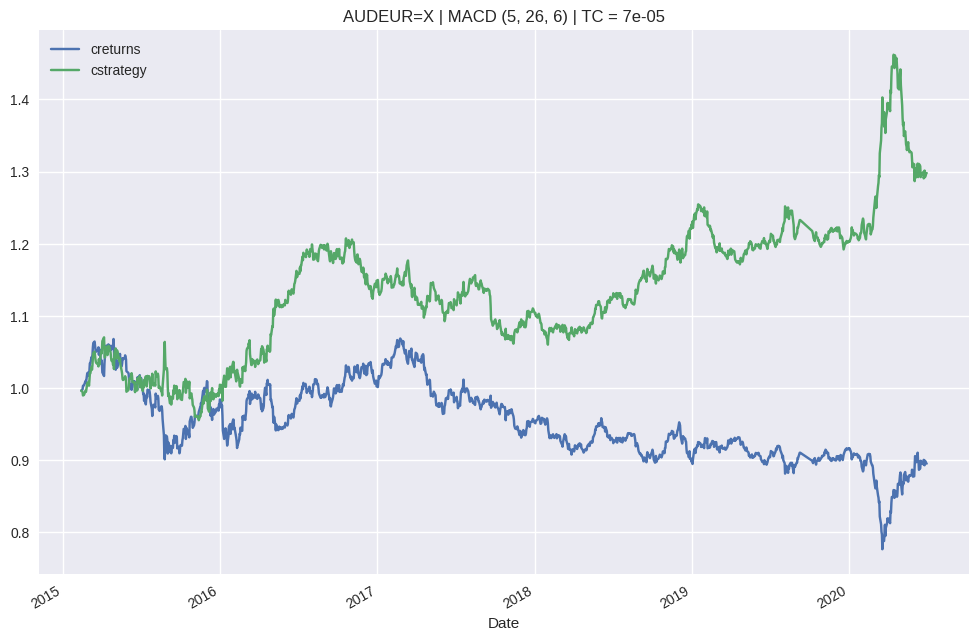

In [44]:
tester.plot_results()

LEZIONE_70:OOP CHALLENGE: Create the MACD Backtester Class

Per velocizzare il processo mi sono aiutato visualizzando il codice per il MACDBacktester, mi è comunque servito per studiare la logica e la sintassi del codice

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

class MACDBacktester():
    ''' Class for the vectorized backtesting of MACD-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    EMA_S: int
        time window in days for shorter EMA
    EMA_L: int
        time window in days for longer EMA
    signal_mw: int
        time window is days for MACD Signal
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        import pandas as pd


          Methods
    =======
    get_data:
        retrieves and prepares the data

    set_parameters:
        sets new MACD parameter(s)

    test_strategy:
        runs the backtest for the MACD-based strategy

    plot_results:
        plots the performance of the strategy compared to buy and hold

    update_and_run:
        updates MACD parameters and returns the negative absolute performance (for minimization algorithm)

    optimize_parameters:
        implements a brute force optimization for the three MACD parameters
    '''




In [46]:

    def __init__(self, symbol, EMA_S, EMA_L, signal_mw, start, end, tc):
        self.symbol = symbol
        self.EMA_S = EMA_S
        self.EMA_L = EMA_L
        self.signal_mw = signal_mw
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()


In [47]:
 def __repr__(self):
        return "MACDBacktester(symbol = {}, MACD({}, {}, {}), start = {}, end = {})".format(self.symbol, self.EMA_S, self.EMA_L, self.signal_mw, self.start, self.end)

In [48]:
 def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["EMA_S"] = raw["price"].ewm(span = self.EMA_S, min_periods = self.EMA_S).mean()
        raw["EMA_L"] = raw["price"].ewm(span = self.EMA_L, min_periods = self.EMA_L).mean()
        raw["MACD"] = raw.EMA_S - raw.EMA_L
        raw["MACD_Signal"] = raw.MACD.ewm(span = self.signal_mw, min_periods = self.signal_mw).mean()
        self.data = raw

In [49]:
 def set_parameters(self, EMA_S = None, EMA_L = None, signal_mw = None):
        ''' Updates MACD parameters and resp. time series.
        '''
        if EMA_S is not None:
            self.EMA_S = EMA_S
            self.data["EMA_S"] = self.data["price"].ewm(span = self.EMA_S, min_periods = self.EMA_S).mean()
            self.data["MACD"] = self.data.EMA_S - self.data.EMA_L
            self.data["MACD_Signal"] = self.data.MACD.ewm(span = self.signal_mw, min_periods = self.signal_mw).mean()

        if EMA_L is not None:
            self.EMA_L = EMA_L
            self.data["EMA_L"] = self.data["price"].ewm(span = self.EMA_L, min_periods = self.EMA_L).mean()
            self.data["MACD"] = self.data.EMA_S - self.data.EMA_L
            self.data["MACD_Signal"] = self.data.MACD.ewm(span = self.signal_mw, min_periods = self.signal_mw).mean()

        if signal_mw is not None:
            self.signal_mw = signal_mw
            self.data["MACD_Signal"] = self.data.MACD.ewm(span = self.signal_mw, min_periods = self.signal_mw).mean()

In [50]:
 def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)

        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()

                # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
         # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | MACD ({}, {}, {}) | TC = {}".format(self.symbol, self.EMA_S, self.EMA_L, self.signal_mw, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

def update_and_run(self, MACD):
        ''' Updates MACD parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        MACD: tuple
            MACD parameter tuple
        '''
        self.set_parameters(int(MACD[0]), int(MACD[1]), int(MACD[2]))
        return -self.test_strategy()[0]

def optimize_parameters(self, EMA_S_range, EMA_L_range, signal_mw_range):
        ''' Finds global maximum given the MACD parameter ranges.

        Parameters
        ==========
        EMA_S_range, EMA_L_range, signal_mw_range : tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (EMA_S_range, EMA_L_range, signal_mw_range), finish=None)
        return opt, -self.update_and_run(opt)









LEZIONE_71: ALTERNATIVE STRATEGIES AND INTERPRETATIONS

In [51]:
#Importiamo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scypy.optimize import brute
from MACDBacktester import MACDBacktester as MACD

In [52]:
tester=MACD("EURUSD=X",EMA_S=12,EMA_L=21,signal_mw=9,start="2004-01-01",end="2020-06-30",tc=0)

In [53]:
alt=tester.data.dropna()
alt

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,,
2004-02-10,1.268504,-0.000711,1.259639,1.258884,0.000755,-0.000947
2004-02-11,1.283005,0.011367,1.263258,1.261210,0.002048,-0.000276
2004-02-12,1.281805,-0.000936,1.266128,1.263185,0.002942,0.000428
2004-02-13,1.272799,-0.007051,1.267159,1.264103,0.003056,0.000993
2004-02-16,1.276503,0.002906,1.268602,1.265281,0.003322,0.001486
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.125123,1.120460,0.004663,0.005788
2020-06-25,1.125087,-0.005449,1.125118,1.120881,0.004237,0.005478
2020-06-26,1.122208,-0.002562,1.124670,1.121002,0.003668,0.005116


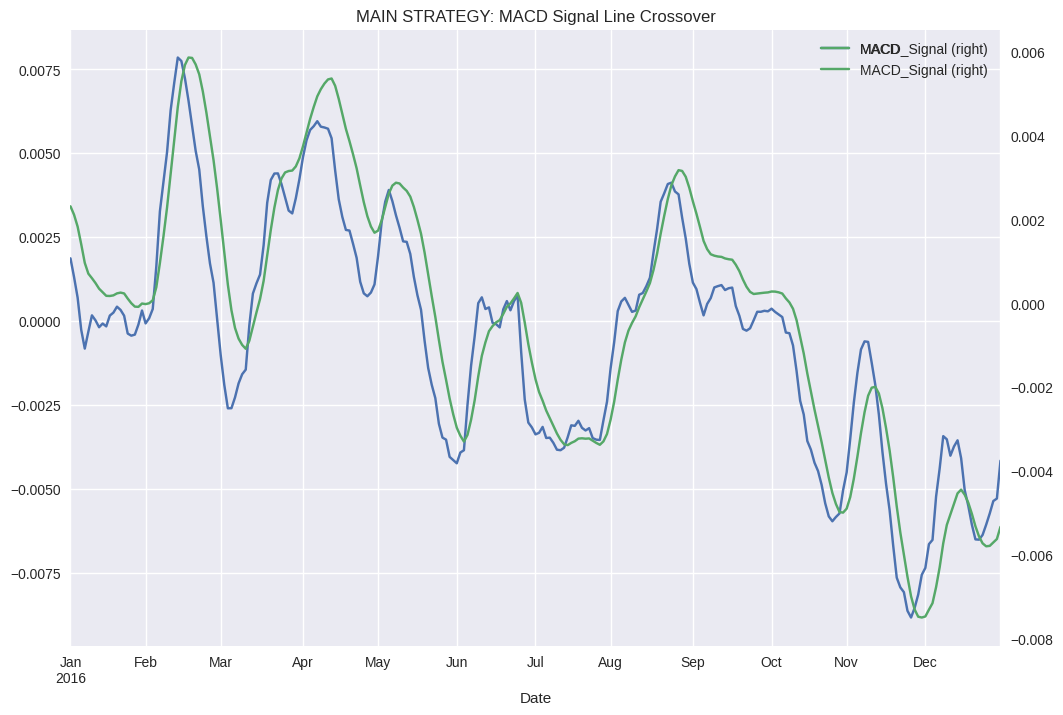

In [56]:
#MAIN STRATEGY: MACD Signal Line Crossover
alt.loc["2016",["MACD","MACD_Signal"]].plot(figsize=(12,8),secondary_y="MACD_Signal")
plt.title("MAIN STRATEGY: MACD Signal Line Crossover",fontsize=12)
plt.legend()
plt.show()

Text(0.5, 1.0, 'LATERNATIVE STRATEGY: ZERO CROSSOVER')

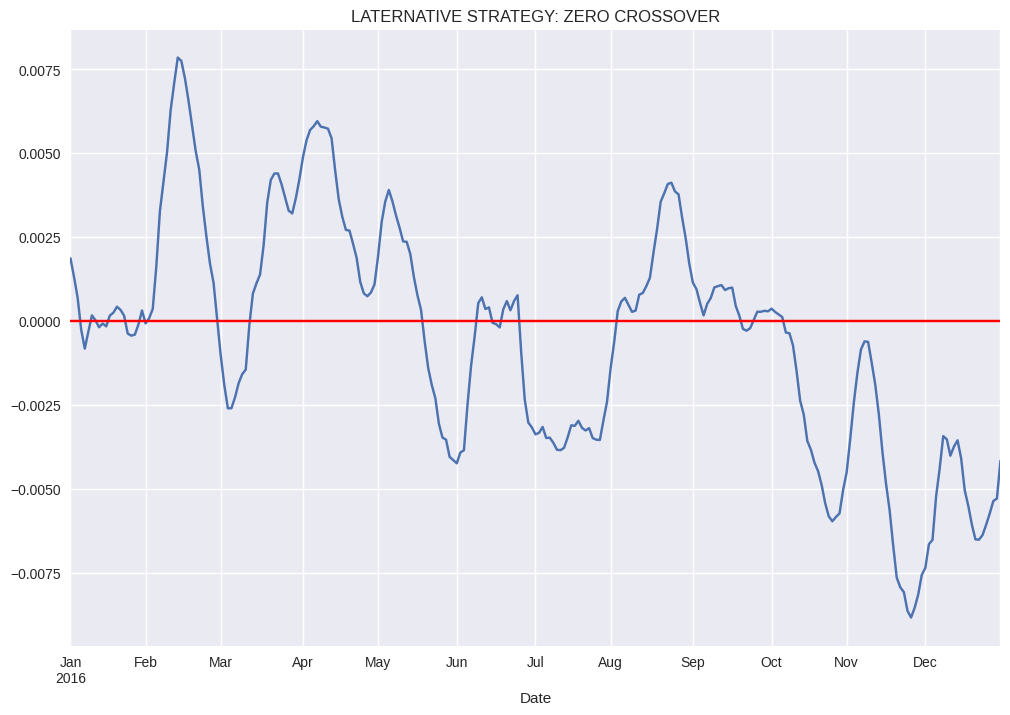

In [61]:
#LATERNATIVE STRATEGY: ZERO CROSSOVER
alt.loc["2016","MACD"].plot(figsize=(12,8))
plt.hlines(y=0,xmin=alt.index.min(),xmax=alt.index.max(),color="red",label="Zero")
plt.title("LATERNATIVE STRATEGY: ZERO CROSSOVER",fontsize=12)

ALTERNATIVE_2:DIVERGENCE

.CONVERGENCE:

if PRICE riches higer highs > MACD riches higer highs(confirmation)

if PRICE richies lower lows < MACD richies lower lows(confirmaton9

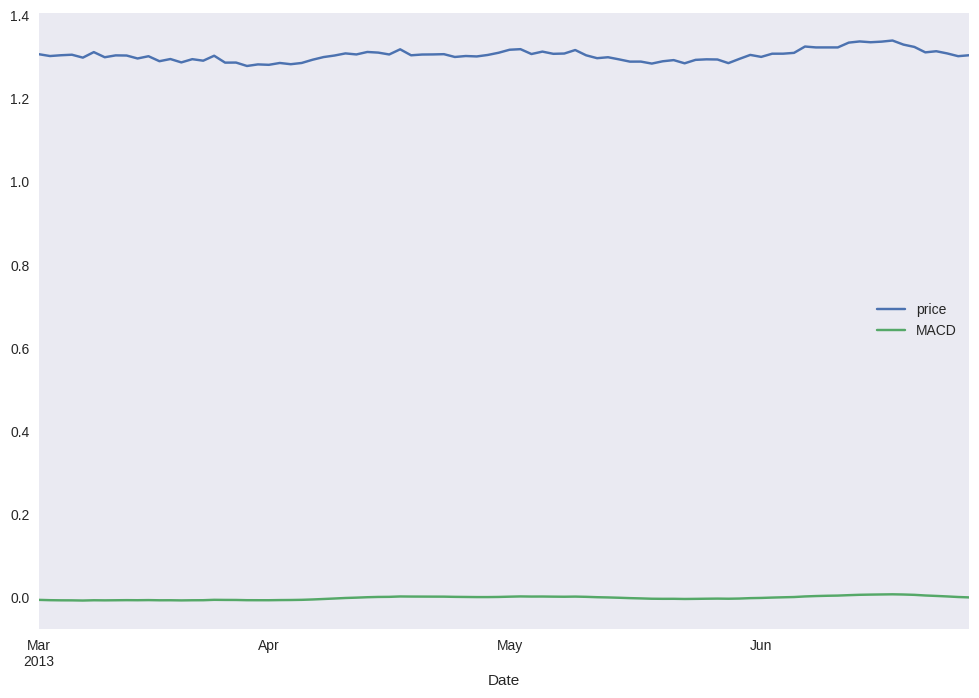

In [67]:
alt.loc["03-2013":"06-2013",["price","MACD"]].plot(figsize=(12,8),secondary_y="MACD_Signal")
plt.show()

.DIVERGENCE:

if PRICE riches higer highs > MACD fail riches higer highs(bearish confirmation)

if PRICE richies lower lows < MACD fail richies lower lows(confirmaton9

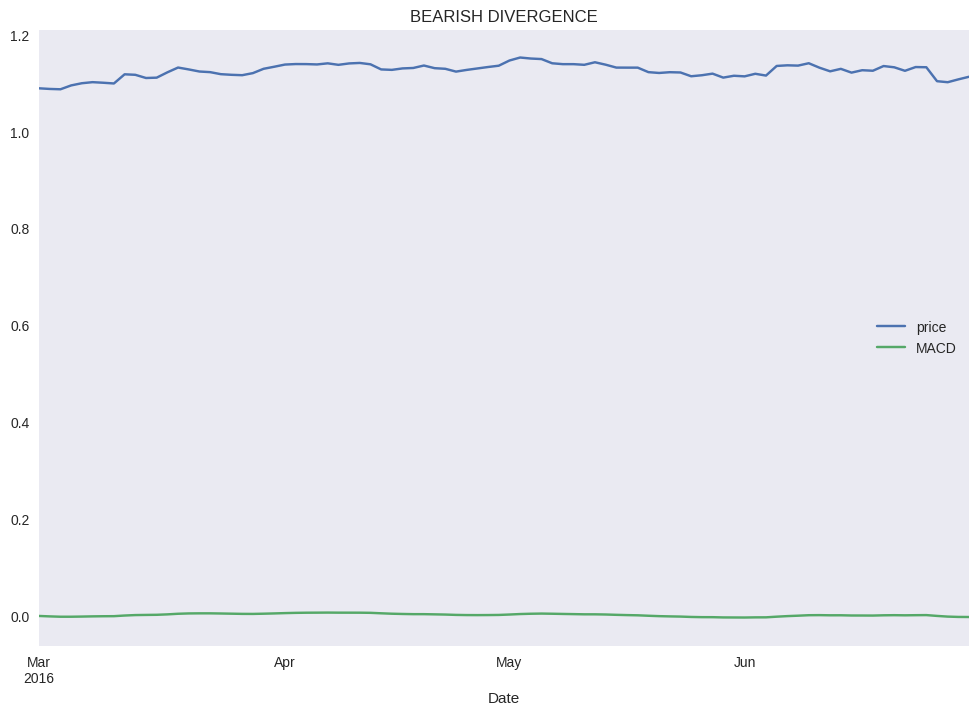

In [72]:
alt.loc["03-2016":"06-2016",["price","MACD"]].plot(figsize=(12,8),secondary_y="MACD_Signal")
plt.title("BEARISH DIVERGENCE",fontsize=12)
plt.show()

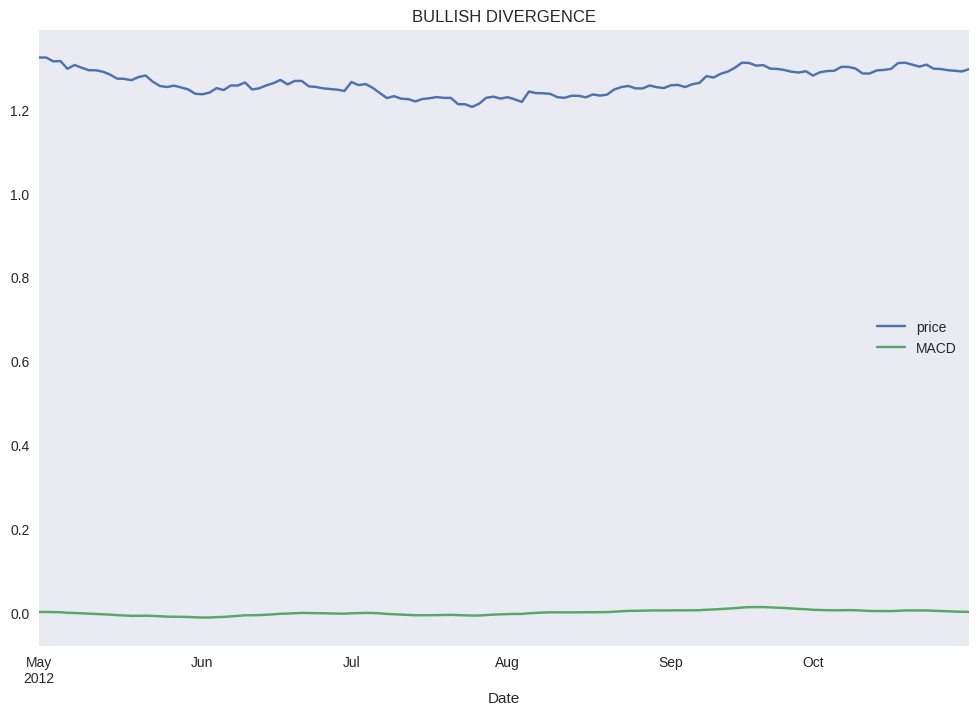

In [73]:
alt.loc["05-2012":"10-2012",["price","MACD"]].plot(figsize=(12,8),secondary_y="MACD_Signal")
plt.title("BULLISH DIVERGENCE",fontsize=12)
plt.show()

NOTA: Non riesco a comprendere perchè l'output sia non conforme all'output presentato nel corso. DA RIVEDERE IN FASE DI RIPASSO